In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv("Cust_Spend_Data_New.csv")

In [3]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [4]:
data_df.shape

(829, 7)

In [5]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [7]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [16]:
data_df.duplicated().sum()

0

In [17]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [19]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = StandardScaler()

In [22]:
scaled_df = X.fit_transform(cust_df)

In [23]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [24]:
k_means = KMeans(n_clusters = 2)

In [25]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [26]:
k_means.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [27]:
k_means.inertia_

2225.8180780994685

In [28]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1074.382380298951

In [30]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

909.4453294086204

In [31]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

4145.0

In [32]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

784.5887748781101

In [33]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

697.8265440467183

In [34]:
wss =[] 

In [35]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [36]:
wss

[4145.0,
 2225.8180780994685,
 1074.382380298951,
 909.4495242917942,
 784.5887748781101,
 697.7964308882454,
 630.9834733592392,
 580.953352765166,
 539.4886665624681,
 515.0364649293502]

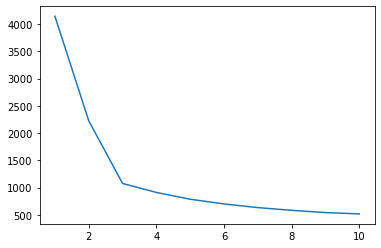

In [37]:
plt.plot(range(1,11), wss)

In [40]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0,

In [41]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
silhouette_score(scaled_df,labels)

0.5863370901372584

In [45]:
sil_width = silhouette_samples(scaled_df,labels)
sil_width

array([0.65605464, 0.51242446, 0.58238018, 0.37519676, 0.70316661,
       0.21533883, 0.40883241, 0.53016965, 0.36212368, 0.46435202,
       0.53273181, 0.38251421, 0.45638838, 0.54265228, 0.59946695,
       0.58742145, 0.70669699, 0.52804742, 0.50993649, 0.51621198,
       0.46439947, 0.45916516, 0.43727811, 0.66885372, 0.58985762,
       0.61143772, 0.29967741, 0.62514869, 0.64122086, 0.67914798,
       0.69348064, 0.41267202, 0.69288439, 0.0820282 , 0.67147334,
       0.65179887, 0.55169861, 0.19310875, 0.57929786, 0.66911281,
       0.54933109, 0.61843536, 0.64293749, 0.64770225, 0.61059923,
       0.42515881, 0.55014745, 0.62945221, 0.4170128 , 0.51390593,
       0.0763273 , 0.61962009, 0.07671105, 0.57562558, 0.47135448,
       0.49643811, 0.68152376, 0.6270269 , 0.37620108, 0.54238286,
       0.39114866, 0.65826701, 0.61888157, 0.62445611, 0.52587586,
       0.23652939, 0.30229326, 0.65941125, 0.67937278, 0.56388553,
       0.60899332, 0.58244297, 0.39735031, 0.4988705 , 0.65145

In [46]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,1,0.656055
1,2,Adela,9818,13,5,2,5,2,0.512424
2,3,Adelina,9824,10,10,2,2,2,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,1,0.703167


In [47]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

In [48]:
data_df.to_csv('km.csv')